## Ocean Sciences Meeting 2026

Figures for Tomy's presentation.  Explore ADCP, thermistor, and oxygen logger data around 26-28.11.2025 and 13.01.2026.

In [11]:
# imports
import ewgreaders as ewg
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Moorings

In [22]:
lake = 'Zugersee'
location = 'LZC'
year = '2026'
date = '20260114'

t_start_nov = '2025-11-19'
t_end_nov = '2025-11-28'

t_start_jan = '2026-01-06'
t_end_jan = '2026-01-13'

In [23]:
mreader = ewg.mooring_reader.MooringReader(lake, location, year, date)
adcps = mreader.get_adcps()
thermistors = mreader.get_thermistors()
oxygen_loggers = mreader.get_oxygen_loggers()

#### ADCPs

In [24]:
adcps

[{'instrument': 'adcp', 'serial_id': '8315', 'mab': 123, 'comments': 'up'},
 {'instrument': 'adcp', 'serial_id': '672', 'mab': 98, 'comments': 'up'},
 {'instrument': 'adcp', 'serial_id': '1728', 'mab': 98, 'comments': 'down'},
 {'instrument': 'adcp', 'serial_id': '16549', 'mab': 41.4, 'comments': 'up'}]

In [45]:
all_adcp_nov = []
all_adcp_jan = []
for adcp in adcps:
    serial_id = adcp['serial_id']

    areader = ewg.adcp_reader.ADCPReader(serial_id, lake, location, year, date)
    fpath = areader.locate_data_file('L0')
    ds = areader.load_from_L0(fpath)
    ds = areader.range_to_depth(ds)
    ds = areader.run_qa(ds)
    ds = areader.qa_corr_stdev(ds)
    print(areader.depth, ds.attrs['cell_size'])
    ds_nov = ds.sel(time=slice(t_start_nov, t_end_nov))
    ds_jan = ds.sel(time=slice(t_start_jan, t_end_jan))
    all_adcp_nov.append(ds_nov)
    all_adcp_jan.append(ds_jan)


Reading file Q:/Messdaten/Aphys_Hypothesis_data/Zugersee/2026/Mooring/20260114/LZC/L0\12U8315.000 ...
43.408226013183594 1.0

Reading file Q:/Messdaten/Aphys_Hypothesis_data/Zugersee/2026/Mooring/20260114/LZC/L0\3U672.000 ...
71.59141540527344 1.5

Reading file Q:/Messdaten/Aphys_Hypothesis_data/Zugersee/2026/Mooring/20260114/LZC/L0\6D1728.000 ...
80.0 1.0

Reading file Q:/Messdaten/Aphys_Hypothesis_data/Zugersee/2026/Mooring/20260114/LZC/L0\3U16549.000 ...
131.96441650390625 1.0


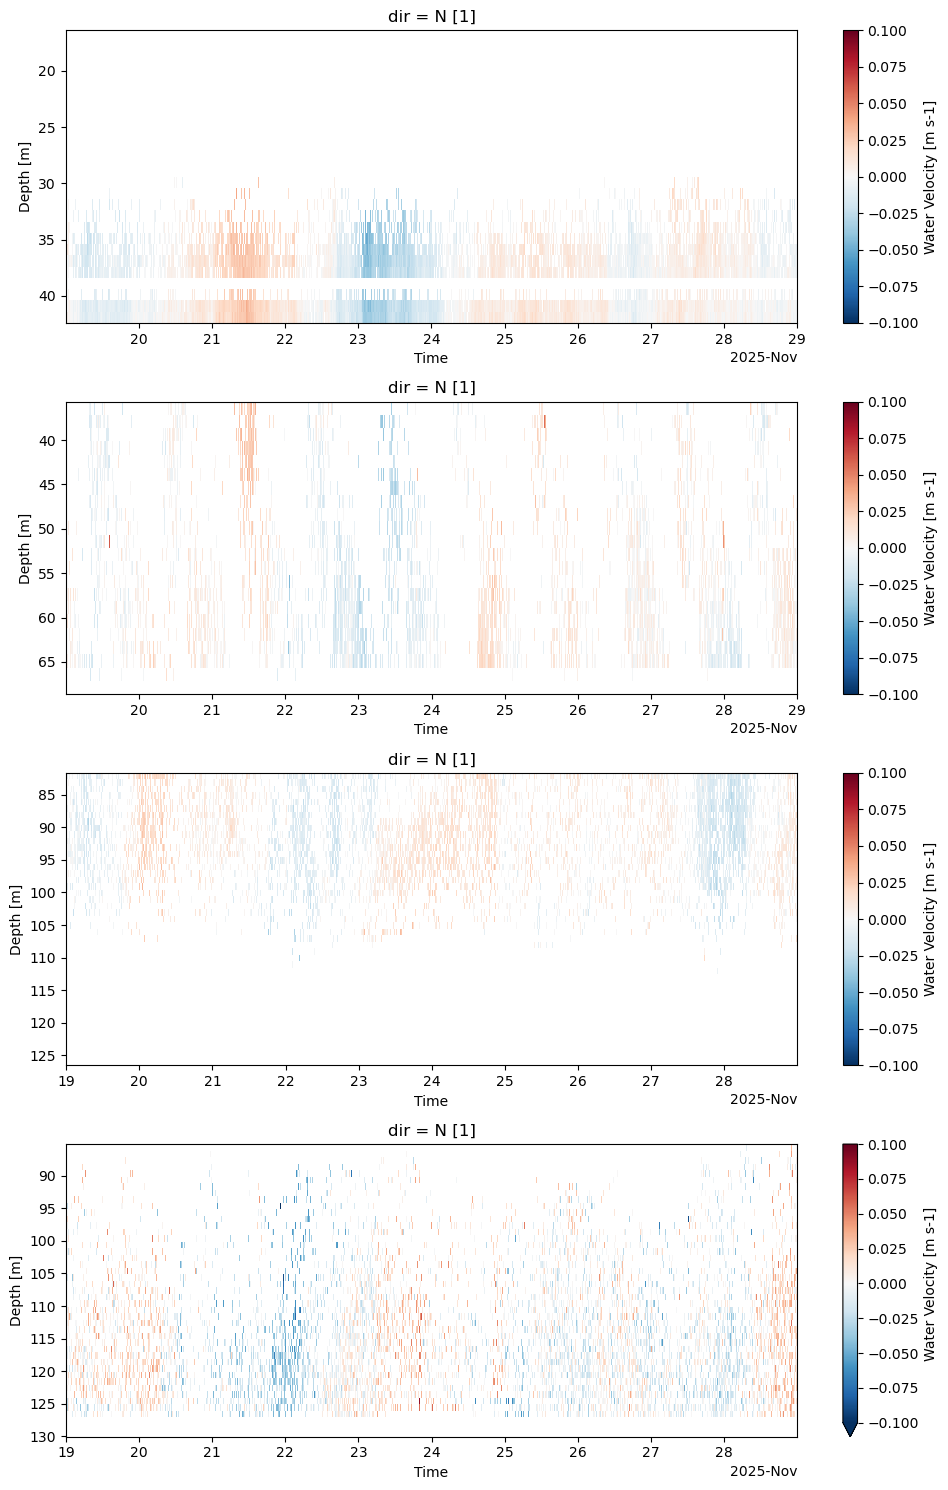

In [46]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

for i, d in enumerate(all_adcp_nov):
    d.vel.sel(dir='N').plot(cmap='RdBu_r', vmin=-0.1, vmax=0.1, ax=ax[i])

    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Depth [m]')

    ax[i].invert_yaxis()

plt.tight_layout()
plt.show()

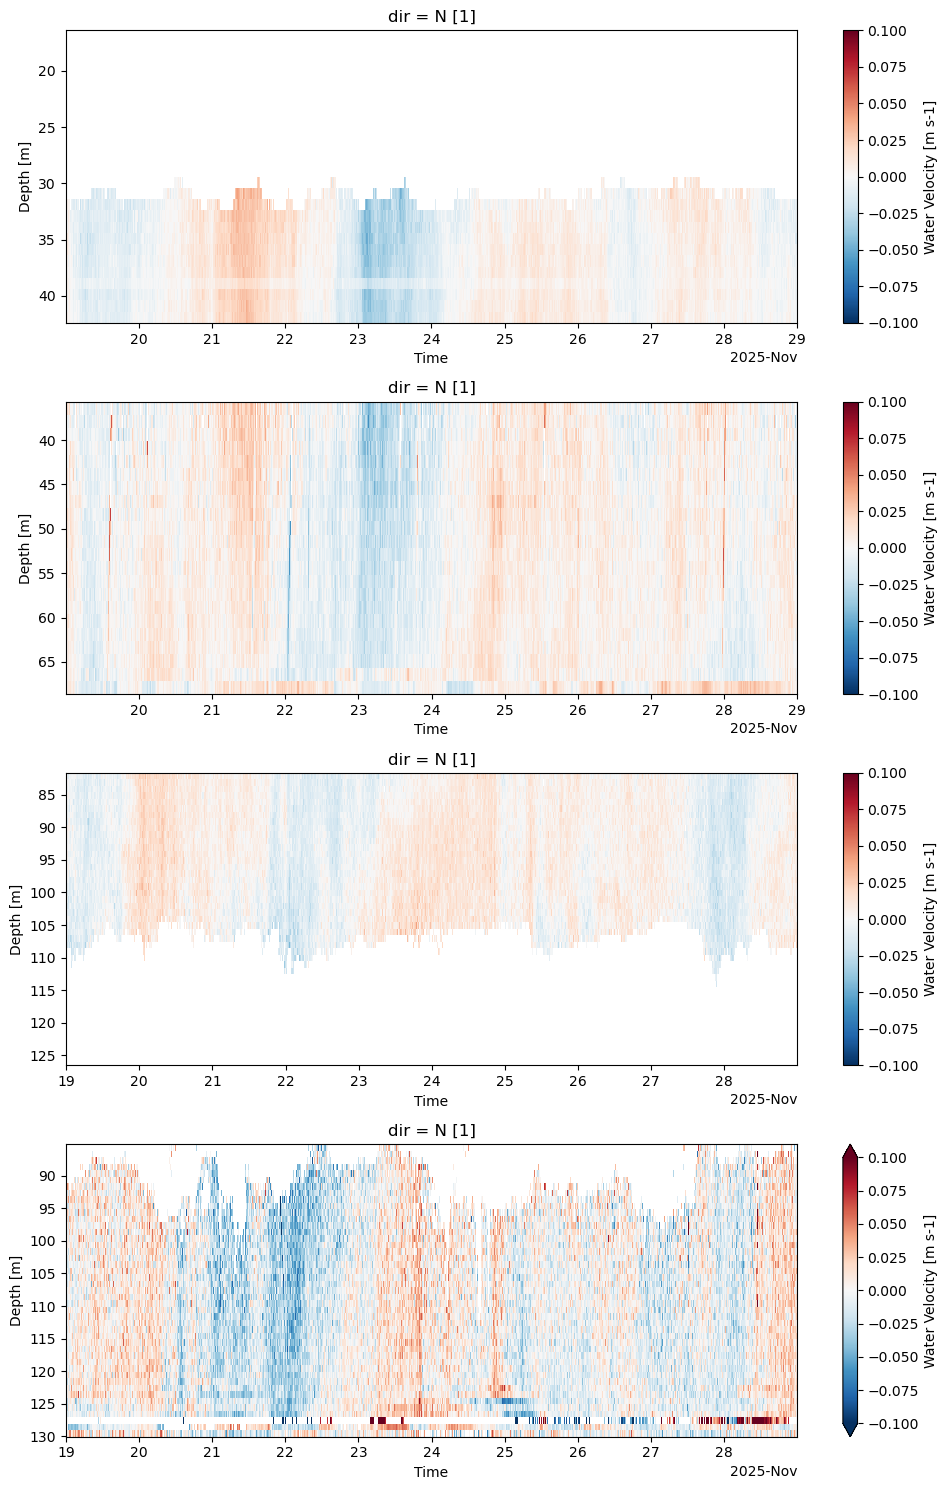

In [43]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

for i, d in enumerate(all_adcp_nov):
    d.vel.sel(dir='N').plot(cmap='RdBu_r', vmin=-0.1, vmax=0.1, ax=ax[i])

    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Depth [m]')

    ax[i].invert_yaxis()

plt.tight_layout()
plt.show()

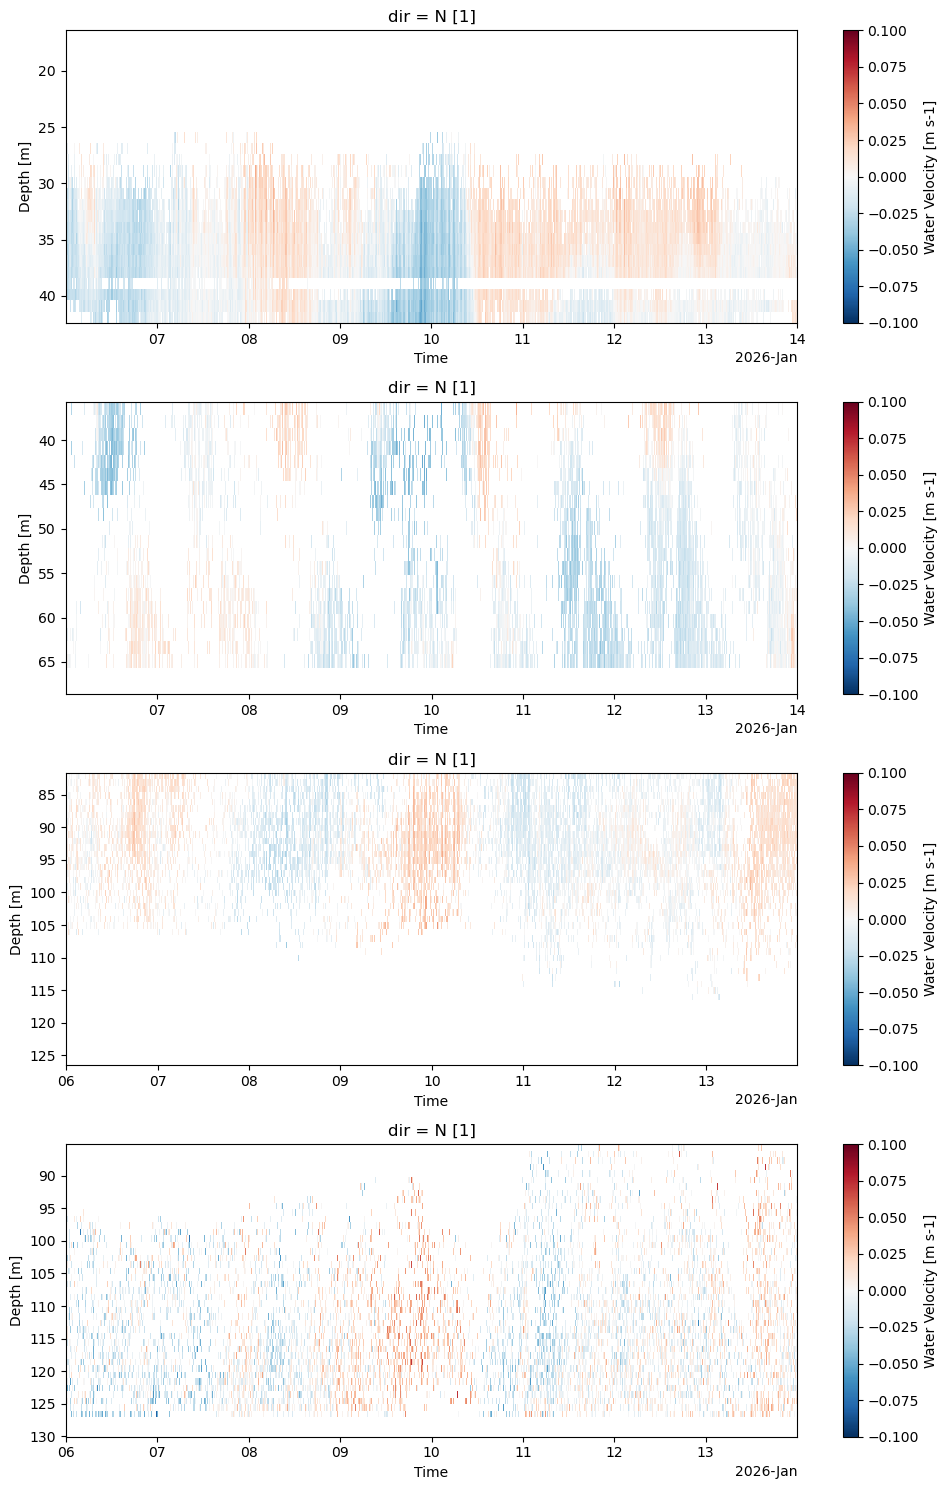

In [47]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

for i, d in enumerate(all_adcp_jan):
    d.vel.sel(dir='N').plot(cmap='RdBu_r', vmin=-0.1, vmax=0.1, ax=ax[i])

    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Depth [m]')

    ax[i].invert_yaxis()

plt.tight_layout()
plt.show()

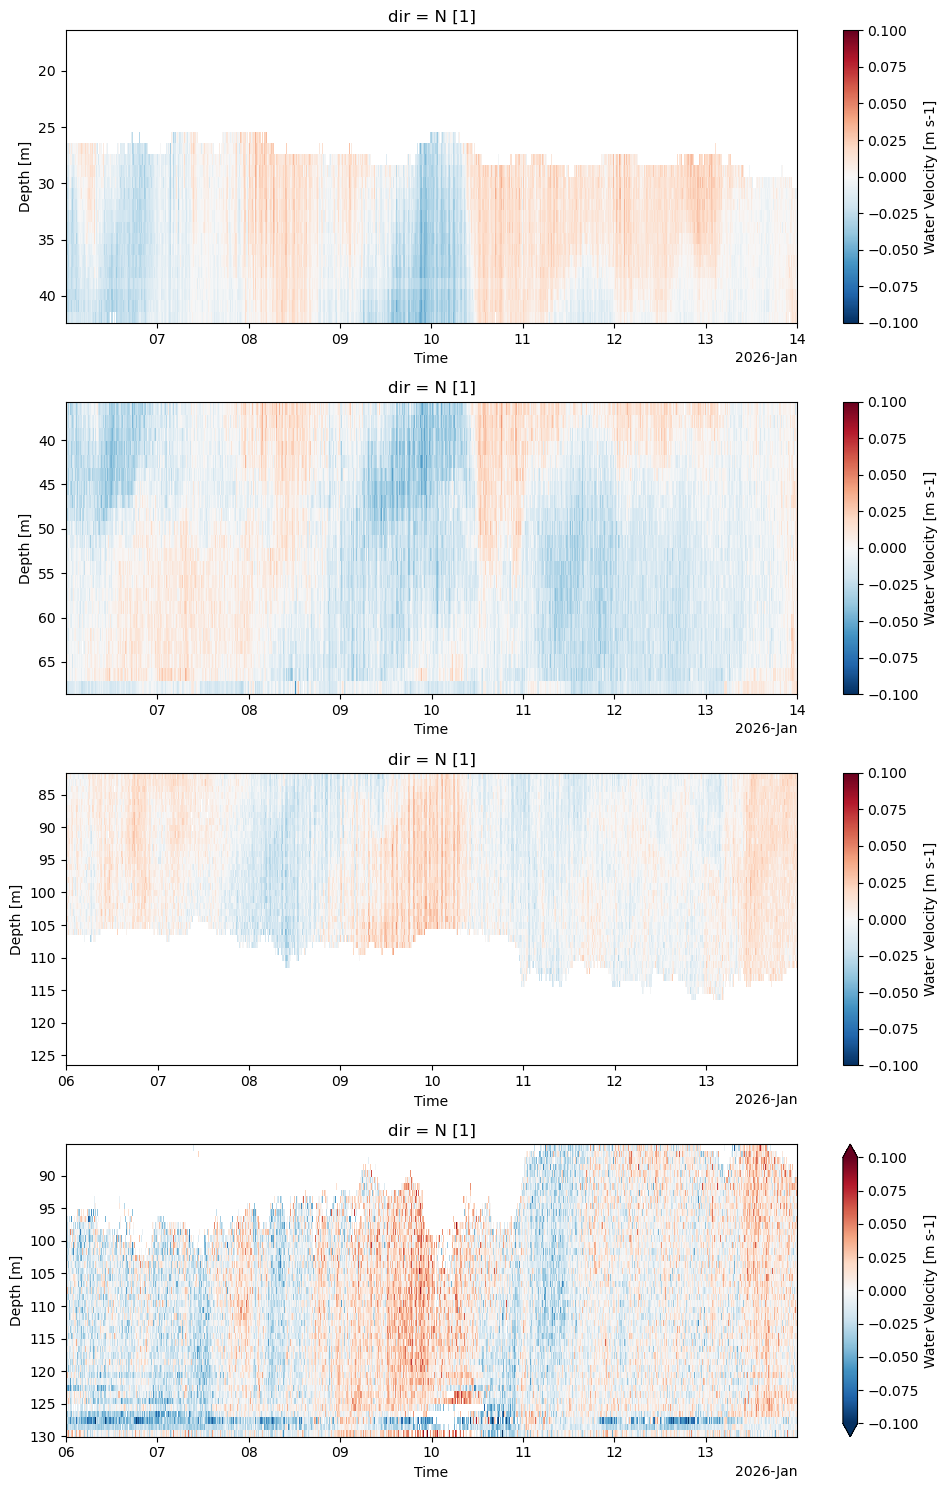

In [44]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

for i, d in enumerate(all_adcp_jan):
    d.vel.sel(dir='N').plot(cmap='RdBu_r', vmin=-0.1, vmax=0.1, ax=ax[i])

    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Depth [m]')

    ax[i].invert_yaxis()

plt.tight_layout()
plt.show()

#### Thermistors

In [25]:
thermistors

[{'instrument': 'rbr_temp', 'serial_id': '200570', 'mab': 120, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '200569', 'mab': 115, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '205523', 'mab': 110, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '205517', 'mab': 105, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '205518', 'mab': 100, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '205535', 'mab': 95, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '205527', 'mab': 90, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '209296', 'mab': 85, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '205521', 'mab': 80, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '200567', 'mab': 75, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '205536', 'mab': 70, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '200575', 'mab': 65, 'comments': ''},
 {'instrument': 'rbr_temp',
  'serial_id': '209

In [49]:
ds_chain_nov = []
ds_chain_jan = []
for t in thermistors:
    serial_id = t['serial_id']

    treader = ewg.thermistor_reader.ThermistorReader(serial_id, lake, location, year, date)
    ds = treader.load_from_L0()
    ds_nov = ds.sel(time=slice(t_start_nov, t_end_nov))
    ds_jan = ds.sel(time=slice(t_start_jan, t_end_jan))
    ds_chain_nov.append(ds_nov)
    ds_chain_jan.append(ds_jan)

ds_temp_nov = mreader.create_instrument_chain(ds_chain_nov)
ds_temp_jan = mreader.create_instrument_chain(ds_chain_jan)

C:\Users\herremha\elcres\ewgreaders\ewgreaders\readers\mooring_reader.py:243: FutureWarning: In a future version of xarray the default value for coords will change from coords='different' to coords='minimal'. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set coords explicitly.
  return xr.concat(ds_aligned, dim='depth')
C:\Users\herremha\elcres\ewgreaders\ewgreaders\readers\mooring_reader.py:243: FutureWarning: In a future version of xarray the default value for coords will change from coords='different' to coords='minimal'. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set coords explicitly.
  return xr.concat(ds_alig

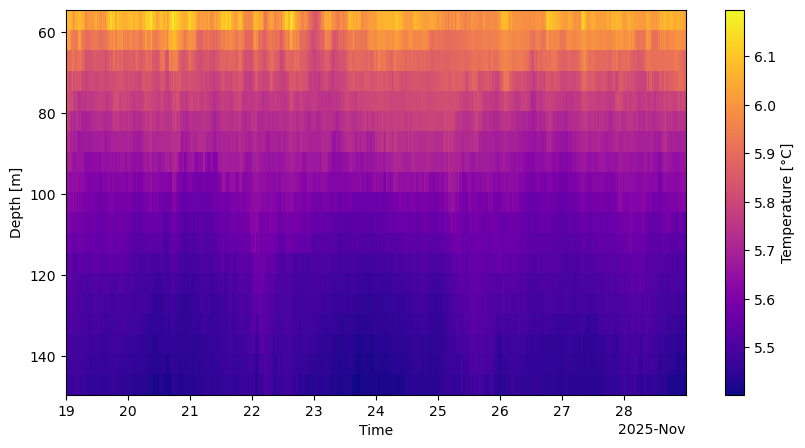

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
im = ds_temp_nov.temp.plot(cmap='plasma', ax=ax)

ax.set_xlabel("Time")
ax.set_ylabel('Depth [m]')
im.colorbar.set_label("Temperature [°C]")

ax.invert_yaxis()
plt.show()

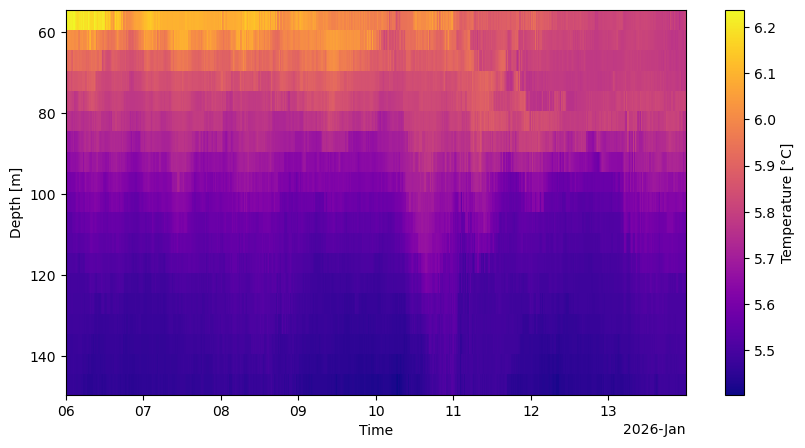

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
im = ds_temp_jan.temp.plot(cmap='plasma', ax=ax)

ax.set_xlabel("Time")
ax.set_ylabel('Depth [m]')
im.colorbar.set_label("Temperature [°C]")

ax.invert_yaxis()
plt.show()

#### Oxygen loggers

In [29]:
oxygen_loggers

[{'instrument': 'minidot', 'serial_id': '007431', 'mab': 70, 'comments': ''},
 {'instrument': 'minidot', 'serial_id': '893460', 'mab': 65, 'comments': ''},
 {'instrument': 'minidot', 'serial_id': '969903', 'mab': 60, 'comments': ''},
 {'instrument': 'minidot', 'serial_id': '899457', 'mab': 55, 'comments': ''},
 {'instrument': 'minidot', 'serial_id': '990558', 'mab': 50, 'comments': ''},
 {'instrument': 'minidot', 'serial_id': '867666', 'mab': 45, 'comments': ''}]

In [30]:
ds_chain_nov = []
ds_chain_jan = []
for ol in oxygen_loggers:
    serial_id = ol['serial_id']

    oreader = ewg.o2_reader.O2Reader(serial_id, lake, location, year, date)
    fpath = os.path.join(mreader.dpath_L0, f'7450-{serial_id}/Cat.txt')
    oreader.fpath = fpath
    oreader.sensor = oreader.get_sensor_type()
    oreader.mab = oreader.get_mab()
    oreader.depth = oreader.set_depth()

    ds = oreader.load_from_L0()
    ds_nov = ds.sel(time=slice(t_start_nov, t_end_nov))
    ds_jan = ds.sel(time=slice(t_start_jan, t_end_jan))
    ds_nov['d_oxygen_conc'] *= (1000/32)    # conver to umol/L
    ds_jan['d_oxygen_conc'] *= (1000/32)
    ds_chain_nov.append(ds_nov)
    ds_chain_jan.append(ds_jan)

ds_do_nov = mreader.create_instrument_chain(ds_chain_nov)
ds_do_jan = mreader.create_instrument_chain(ds_chain_jan)

C:\Users\herremha\elcres\ewgreaders\ewgreaders\readers\mooring_reader.py:243: FutureWarning: In a future version of xarray the default value for coords will change from coords='different' to coords='minimal'. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set coords explicitly.
  return xr.concat(ds_aligned, dim='depth')
C:\Users\herremha\elcres\ewgreaders\ewgreaders\readers\mooring_reader.py:243: FutureWarning: In a future version of xarray the default value for coords will change from coords='different' to coords='minimal'. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set coords explicitly.
  return xr.concat(ds_alig

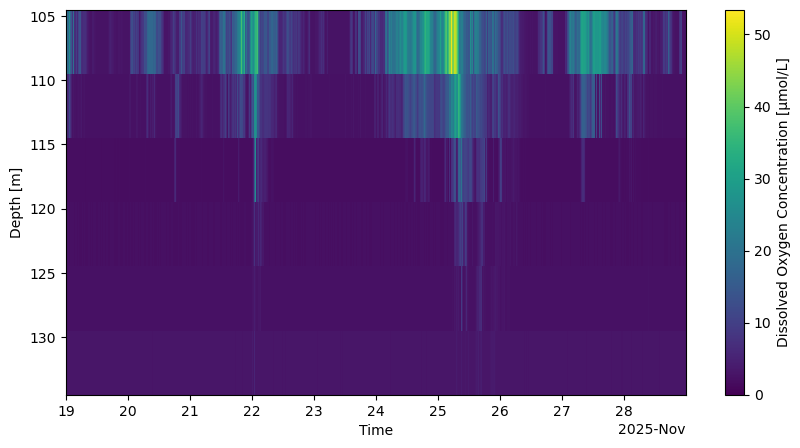

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
im = ds_do_nov.d_oxygen_conc.plot(cmap='viridis', vmin=0, ax=ax)

ax.set_xlabel("Time")
ax.set_ylabel('Depth [m]')
im.colorbar.set_label("Dissolved Oxygen Concentration [µmol/L]")

ax.invert_yaxis()
plt.show()

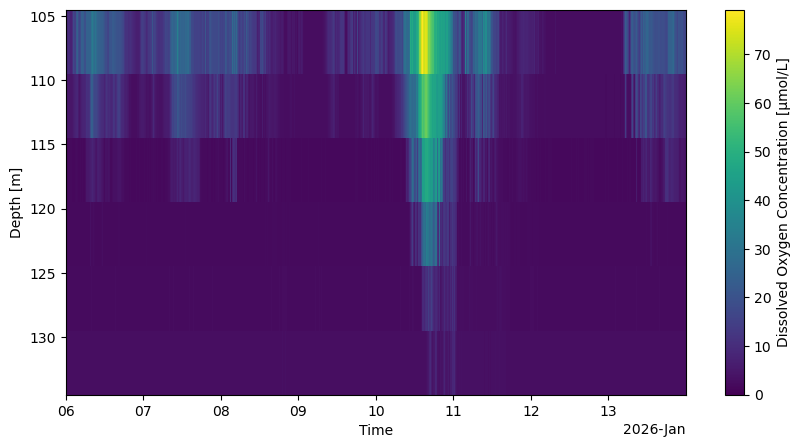

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
im = ds_do_jan.d_oxygen_conc.plot(cmap='viridis', vmin=0, ax=ax)

ax.set_xlabel("Time")
ax.set_ylabel('Depth [m]')
im.colorbar.set_label("Dissolved Oxygen Concentration [µmol/L]")

ax.invert_yaxis()
plt.show()

In [40]:
df_do = ds_do_jan.to_dataframe().reset_index()
df_do

,depth,time,temp,d_oxygen_conc,d_oxygen_sat,serial_id
0,107,2026-01-06 00:00:00,5.527,7.78125,2.078026,007431
1,107,2026-01-06 00:01:00,5.527,7.87500,2.103063,007431
2,107,2026-01-06 00:02:00,5.497,7.90625,2.109786,007431
3,107,2026-01-06 00:03:00,5.527,8.06250,2.153136,007431
4,107,2026-01-06 00:04:00,5.527,8.18750,2.186518,007431
...,...,...,...,...,...,...
69115,132,2026-01-13 23:55:00,5.479,2.93750,0.783512,867666
69116,132,2026-01-13 23:56:00,5.489,2.93750,0.783713,867666
69117,132,2026-01-13 23:57:00,5.519,2.96875,0.792659,867666
69118,132,2026-01-13 23:58:00,5.509,2.96875,0.792456,867666


<Axes: xlabel='time', ylabel='d_oxygen_conc'>

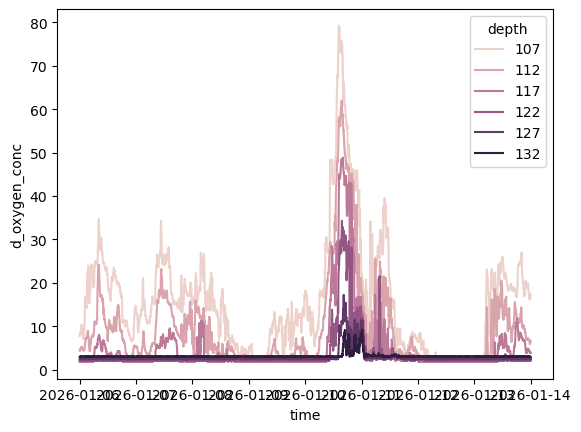

In [41]:
sns.lineplot(df_do, x='time', y='d_oxygen_conc', hue='depth')